# Trade-off Values Test

## Notebook for testing trade-off computation.

This notebook demonstrates the use of `tradeoff()` function in `dm` module.

In [1]:
%matplotlib notebook
%reload_ext autoreload
%autoreload 2

import sys
import os

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams.update({'figure.max_open_warning': 0})

<IPython.core.display.Javascript object>


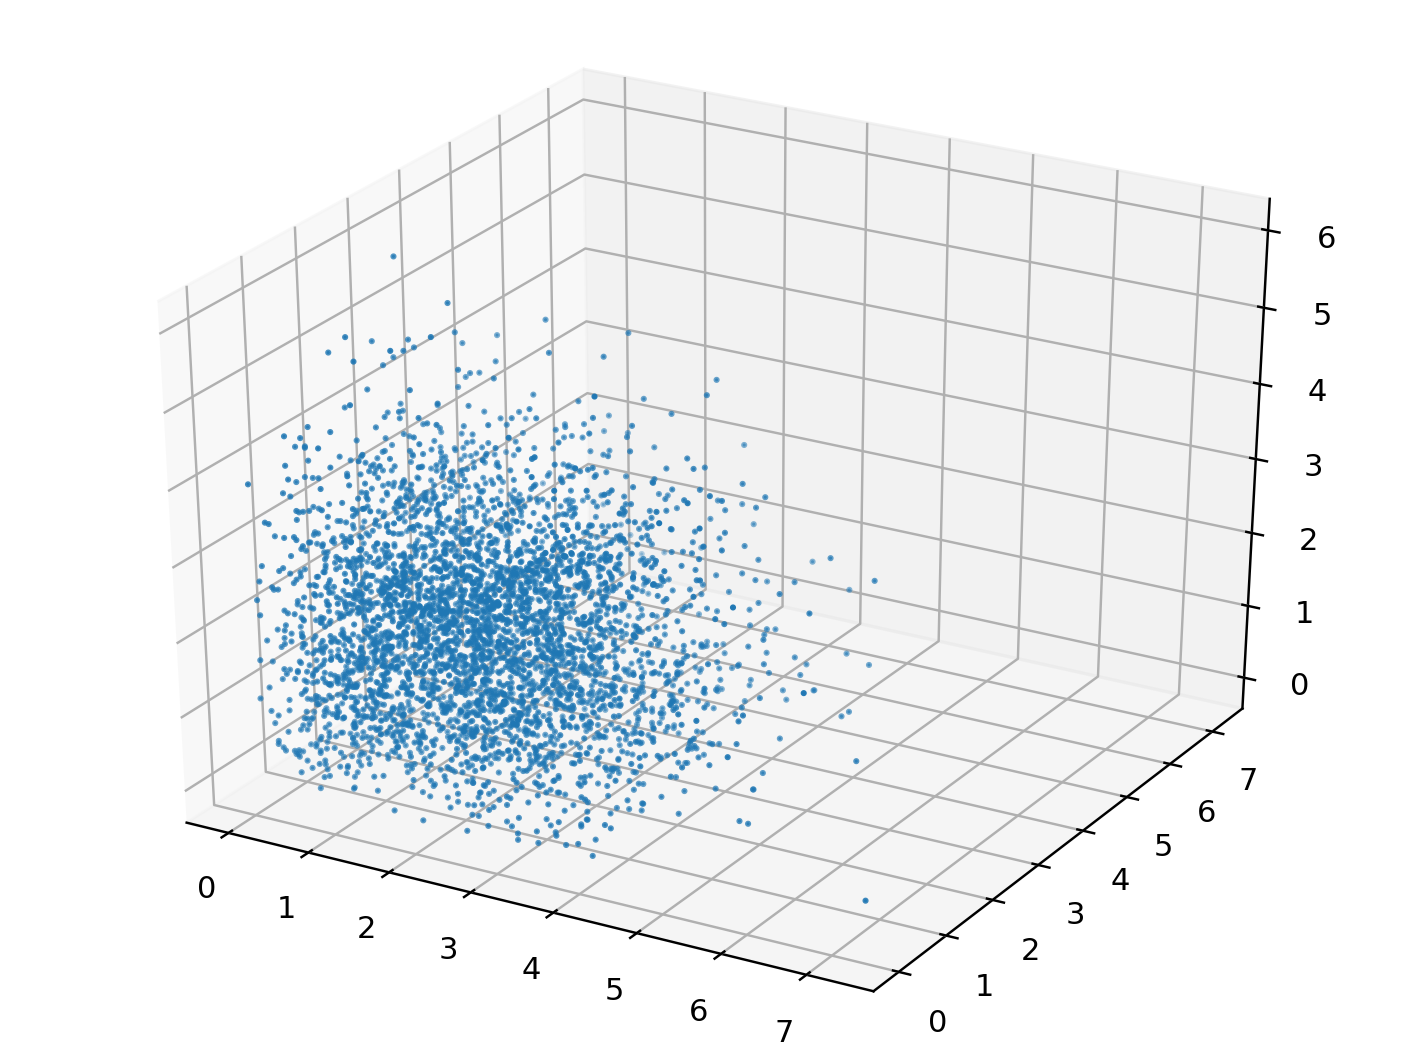

In [2]:
dim = '8d'
# fullpathf = "../data/debmdk-all-nbi/{0:s}/dataf.csv".format(dim)
fullpathf = "../data/debmdk-all/{0:s}/dataf.csv".format(dim)

path, filenamef = os.path.split(fullpathf)
dirs = path.split('/')
frontname = dirs[-2]

F = np.loadtxt(fullpathf, delimiter = ',')

# Plot
if dim == "2d":
    fig = plt.figure()
    ax = fig.gca()
    ax.scatter(F[:,0], F[:,1], s = 1)
    plt.show()
else:
    fig = plt.figure()
    ax1 = Axes3D(fig)
    ax1.scatter(F[:,0], F[:,1], F[:,2], s = 1)
    plt.show()

### Test with the module from `pymoo`

<IPython.core.display.Javascript object>


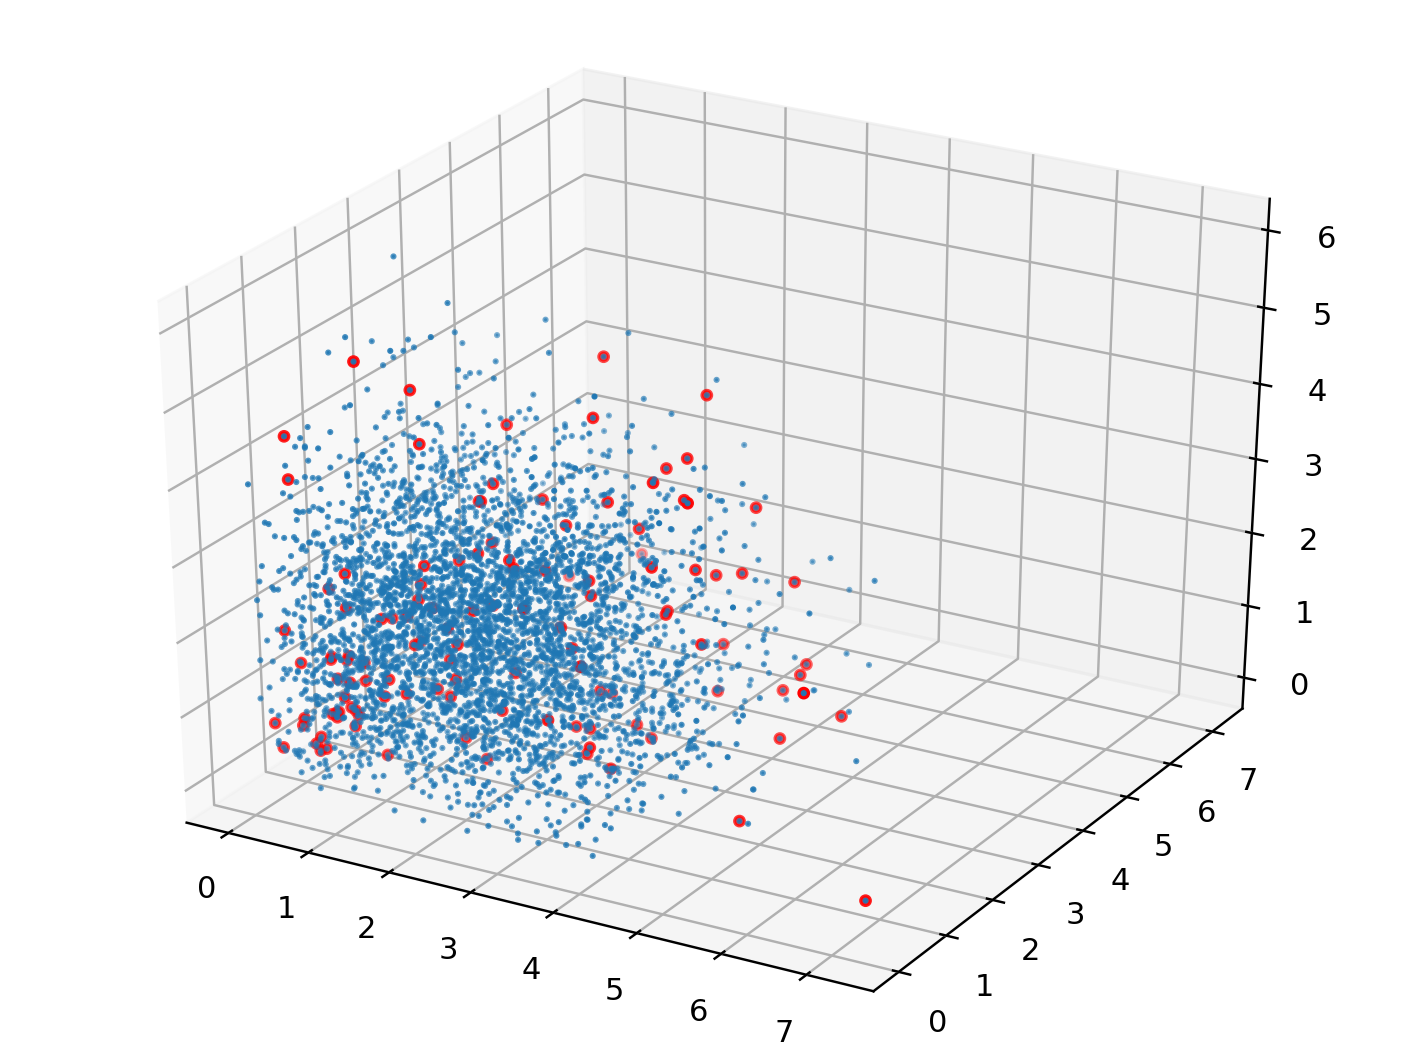

In [3]:
import os
import numpy as np
from pymoo.factory import get_decision_making

dm = get_decision_making("high-tradeoff")

Ik = dm.do(F)

# Plot
if dim == "2d":
    fig = plt.figure()
    ax = fig.gca()
    ax.scatter(F[:,0], F[:,1], s = 1)
    ax.scatter(F[Ik,0], F[Ik,1], color = 'red', s = 10)
    plt.show()
else:
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(F[:,0], F[:,1], F[:,2], s = 1)
    ax.scatter(F[Ik,0], F[Ik,1], F[Ik,2], color = 'red', s = 10)
    plt.show()

### Test with `dm` module of ours, since the implementation is slightly different.

<IPython.core.display.Javascript object>


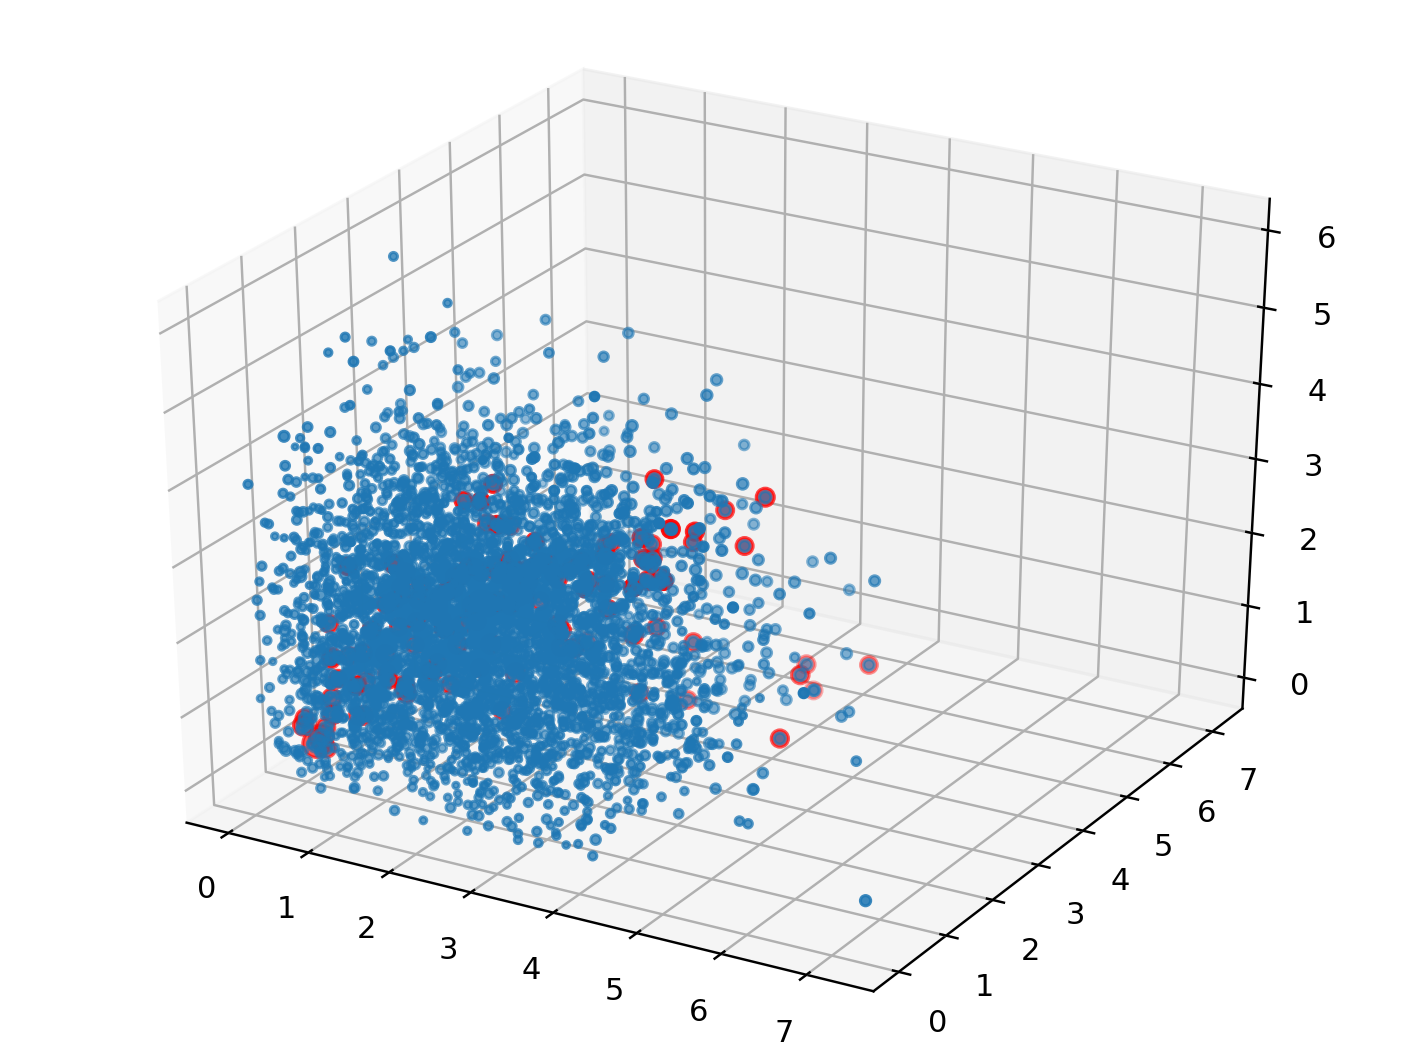

In [8]:
sys.path.append('../src')
from utils import dm

"""
These parameters found to be quite good settings for DEBMDK problems.
But for other problems, they might be completely different.
"""
# Mu,Ik = dm.tradeoff(F, epsilon = 0.125, penalize_extremes = False) #2d-nbi
# Mu,Ik = dm.tradeoff(F, epsilon = 0.125, penalize_extremes = False) #3d-nbi
# Mu,Ik = dm.tradeoff(F, epsilon = 0.125, penalize_extremes = False) #4d-nbi
# Mu,Ik = dm.tradeoff(F, epsilon = 0.5, penalize_extremes = False) #8d-nbi
# Mu,Ik = dm.tradeoff(F, k = 200, penalize_extremes = False) #8d-nbi

# Mu,Ik = dm.tradeoff(F, epsilon = 0.125, penalize_extremes = False) #2d-lhs
# Mu,Ik = dm.tradeoff(F, epsilon = 0.125, penalize_extremes = False) #3d-lhs
# Mu,Ik = dm.tradeoff(F, epsilon = 0.25, penalize_extremes = True) #4d-lhs
# Mu,Ik = dm.tradeoff(F, epsilon = 0.25, penalize_extremes = True) #8d-lhs
Mu,Ik = dm.tradeoff(F, k = 200, penalize_extremes = True) #8d-lhs

# change size w.r.t. Mu
sMu = (Mu + 0.1) * 30.0
# knee points are the biggest
sK = sMu[Ik] * 2.5

# Plot
if dim == "2d":
    fig = plt.figure()
    ax = fig.gca()
    ax.scatter(F[:,0], F[:,1], s = sMu)
    ax.scatter(F[Ik,0], F[Ik,1], color = 'red', s = sK)
    plt.show()
else:
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(F[:,0], F[:,1], F[:,2], s = sMu)
    ax.scatter(F[Ik,0], F[Ik,1], F[Ik,2], color = 'red', s = sK)
    plt.show()